In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def get_train_test(df,test_size=0.5):   
    """Split Data into train and test sets."""
    y = df.action
    X = df.drop(["action"], axis=1)
    X = pd.get_dummies(X,)
    # X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

In [4]:
# 获取数据
df_original = pd.read_csv('final_test1.csv')
df_original['action'] = df_original['action'].astype(int)
df_original['priority'] = df_original['priority'].map(lambda x:x/df_original['priority'].max())
df_original = df_original.drop(['handle'],axis=1)
for i in range(2,10):
    try:
        filename = 'final_test' + str(i) + '.csv'
        df_tmp = pd.read_csv(filename)
        df_tmp['action'] = df_tmp['action'].astype(int)
        df_tmp['priority'] = df_tmp['priority'].map(lambda x:x/df_tmp['priority'].max())
        df_tmp = df_tmp.drop(['handle'],axis=1)
        df_original = df_original.append(df_tmp, ignore_index=True)
    except Exception as e:
        pass

In [5]:
df_original.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228401 entries, 0 to 228400
Columns: 270 entries, initial_direction to old_position
dtypes: float64(255), int64(13), object(2)
memory usage: 481.0 MB


In [6]:
for dtype in ['float64','int64','object']:
    selected_dtype = df_original.select_dtypes(include = [dtype])  #选出类型为"dtype"的所有数据
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b/1024**2
    print ('平均内存占用:(MB)',dtype,mean_usage_mb)

平均内存占用:(MB) float64 1.7357549369335175
平均内存占用:(MB) int64 1.6181013924734933
平均内存占用:(MB) object 4.669911702473958


In [5]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):  #如果传入的pandas_obj是DataFrame类型
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:                                   #如果传入的pandas_obj是其它非DataFrame类型
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b/1024**2
    return '{:03.2f} MB'.format(usage_mb)

gl_int = df_original.select_dtypes(include = ['int64'])
coverted_int = df_original.apply(pd.to_numeric,downcast='unsigned')  #downcast='unsigned' 向下进行整型的转化
print (mem_usage(gl_int))
print (mem_usage(coverted_int))

295.58 MB
5618.88 MB


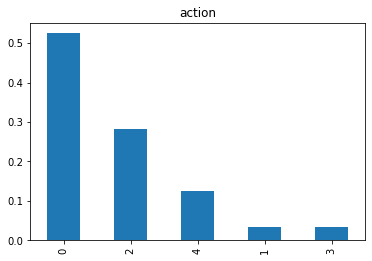

0    119856
2     64413
4     28784
1      7689
3      7659
Name: action, dtype: int64


In [7]:
df_original.action.value_counts(normalize=True).plot(
    kind="bar", title="action")
plt.show()
print(df_original.action.value_counts(normalize=False))

In [7]:
tmp_0 = df_original[df_original['action']==0].sample(n=103218,random_state=124,axis=0)
tmp_2 = df_original[df_original['action']==2].sample(n=103218,random_state=124,axis=0)
tmp_4 = df_original[df_original['action']==4].sample(n=103218,random_state=124,axis=0)
tmp_1 = df_original[df_original['action']==1].sample(n=103218,random_state=124,axis=0)
tmp_3 = df_original[df_original['action']==3]

In [8]:
df = tmp_0.append([tmp_2,tmp_4,tmp_1,tmp_3], ignore_index=True)
df = df.sample(frac=1)  # shuffle

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
SEED = 222
def get_train_test(df,test_size=0.5):   
    """Split Data into train and test sets."""
    y = df.action
    X = df.drop(["action"], axis=1)
    X = pd.get_dummies(X,)
    # X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

xtrain, xtest, ytrain, ytest = get_train_test(df,test_size=0.1)
clf = AdaBoostClassifier(n_estimators=400)
clf.fit(xtrain,ytrain)
y_predict = clf.predict(xtest)
print(classification_report(ytest, y_predict, labels=None, target_names=None, sample_weight=None, digits=2))
confusion_matrix(ytest, y_predict)

In [ ]:
y_predict = clf.predict(xtrain)
print(classification_report(ytrain, y_predict, labels=None, target_names=None, sample_weight=None, digits=2))
confusion_matrix(ytrain, y_predict)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = get_train_test(df,test_size=0.1)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(xtrain,ytrain)
y_predict = clf.predict(xtest)
print(classification_report(ytest, y_predict, labels=None, target_names=None, sample_weight=None, digits=2))
confusion_matrix(ytest, y_predict)

In [ ]:
y_predict = clf.predict(xtrain)
print(classification_report(ytrain, y_predict, labels=None, target_names=None, sample_weight=None, digits=2))
confusion_matrix(ytrain, y_predict)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xtrain, xtest, ytrain, ytest = get_train_test(df,test_size=0.1)
clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(xtrain,ytrain)
y_predict = clf.predict(xtest)
print(classification_report(ytest, y_predict, labels=None, target_names=None, sample_weight=None, digits=2))
confusion_matrix(ytest, y_predict)

In [ ]:
y_predict = clf.predict(xtrain)
print(classification_report(ytrain, y_predict, labels=None, target_names=None, sample_weight=None, digits=2))
confusion_matrix(ytrain, y_predict)

In [ ]:
clf = 0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
SEED = 222
def get_train_test(df,test_size=0.5):   
    """Split Data into train and test sets."""
    y = df.action
    X = df.drop(["action"], axis=1)
    X = pd.get_dummies(X,)
    # X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)
xtrain, xtest, ytrain, ytest = get_train_test(df,test_size=0.5)

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors=7)
clf5 = SVC(kernel='rbf', probability=True)

eclf1 = VotingClassifier(estimators=[('rf', clf1),('svc', clf2),('aa', clf3),('bb',clf4),('cc',clf5)], voting='hard', n_jobs=1)
eclf1 = eclf1.fit(xtrain, ytrain)

y_predict = eclf1.predict(xtest)
print(classification_report(ytest, y_predict, labels=None, target_names=None, sample_weight=None, digits=2))
confusion_matrix(ytest, y_predict)

/home/lomo/anaconda33/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
